# **AISaturdays ECG Challenge**

![AISaturdays](https://www.saturdays.ai/assets/images/ai-saturdays-122x122.png)

Bienvenidas todas las personas al reto de esta semana. Esta vez detectaremos casos de enfermedad cardiovascular a través del análisis de electrocardiogramas (ECG) de los latidos del corazón.

**Instrucciones:**

- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: Pandas, MatPlotLib, Numpy y keras.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar los NoteBooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Limpiar y normalizar la información del dataset.
 - Representar y analizar la información del dataset.
- Aplicar un modelo de NN .
- Mejorar la predicción optimizando el modelo.

Este ejercicio está basado en un [paper](https://arxiv.org/pdf/1805.00794.pdf) que resuelve el problema al que nos enfrentamos. Tomadlo como una fuente de inspiración.

¡Empecemos!

### 0. Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Análisis de datos

### 1. Importa el dataset.



In [2]:
#Solo una linea de código.
df = pd.read_csv('mitbih_train.csv')

### 2. ¿Qué forma tiene el dataset?

In [3]:
#Solo una linea de código.
df.shape

(87553, 188)

### 3. Vamos a ver cómo son los datos. Muestra las primero cinco filas del dataset.

In [4]:
#Solo una linea de código.
df.head(5)

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Este es el dataset de hoy. Esta vez, cada columna representa una lectura del electrocardiograma (recogido a 125Hz). Si en total hay 187 lecturas, en estas columnas tenemos alrededor de segundo y medio de pulsaciones. La última columna contiene la categoría a la que pertenecen estas pulsaciones. En total hay cinco, cada una representada por un número: 

- Normal: 0
- Arritmia prematura (atrial, aberrante-atrial, nodal o supra-ventricular) : 1
- Contracción prematura ventricular o escape ventricular: 2
- Fusión de la contracción ventricular y normal: 3
- Resucitación, fusión de normal y resucitación o inclasificable: 4


### 4. Describe la distribución de los datos.

In [11]:
#Solo una linea de código.
df.describe()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
count,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,...,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000
mean,0.890359,0.758158,0.423969,0.219104,0.201127,0.210399,0.205809,0.201774,0.198693,0.196758,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473382
std,0.240910,0.221814,0.227305,0.206880,0.177058,0.171910,0.178482,0.177241,0.171778,0.168358,...,0.044155,0.042089,0.040525,0.038651,0.037193,0.036255,0.034790,0.032865,0.031924,1.143190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682482,0.250965,0.048458,0.082329,0.088415,0.073333,0.066116,0.065000,0.068643,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826007,0.429467,0.165992,0.147870,0.158798,0.145320,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287634,0.298246,0.295393,0.290837,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


### 5. Vamos a ver cómo es uno de estos electrocardiogramas. Haz una gráfica con los datos de una de las filas.

<AxesSubplot:>

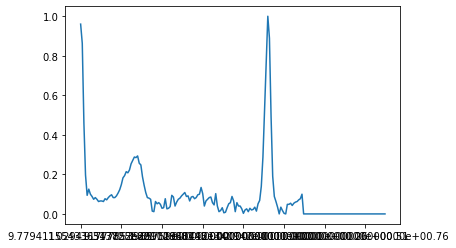

In [10]:
#Solo una linea de código.
df.iloc[0].plot()

### 6. Ahora que hemos visualizado nuestros datos, vamos a trabajar con ellos. Primero tenemos que dividirlos entre input y output. 

Divide el dataset en dos: una parte que contenga todas las columnas con datos del electrocardiograma y otro con las etiquetas. Transformar el dataset en un array de Numpy lo hace mas fácil porque puedes usar slicing. 

In [ ]:
#Tres lineas de código, usando .values y slicing.


### 7. Crea arrays con los índices de los ejemplos que pertenecen a cada categoría. La función [np.argwhere](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argwhere.html) viene muy bien aquí. 

In [ ]:
#5 lineas de código


### 8. Cuenta cuántos ejemplos tenemos de cada categoría.

In [ ]:
#5 lineas de código


### 9. Para ver mejor cuántos tenemos de cada tipo vamos a hacer un gráfico de barras. Utiliza [plt.bar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) con una label apropiada para cada barra.

In [ ]:
#Dos lineas de código


### 10. Finalmente, vamos a comparar electrocardiogramas de un tipo con los otros con otra gráfica. Dibuja un electrocardiograma de cada tipo, uno encima del otro. Puntos extra por ponerle un título y leyenda.

In [ ]:
#6 lineas de código


## Preparación de datos

### 11. La mejor forma de tratar con categorias es utilizar un OneHotEncoding. Transforma Y a su OneHotEncoding.

In [ ]:
#Dos lineas de código


### 12. Comprueba que el OneHotEncoding ha funcionado, es decir, que por cada columna en la Y original se han creado 5, y que los valores del original y el OneHotEncoding se corresponden entre sí.

In [ ]:
#4 lineas de código


### 13. Mezcla X e Y de forma aleatoria (para que las etiquetas todavía se refieran a los ejemplos originales, usa [shuffle](https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html)).

In [ ]:
#Dos lineas de código


### 14. Para poder introducir los datos en el modelo, necesitamos que cada punto de información esté solo dentro del array (no podemos dar un array como valor). Antes teníamos los datos estructurados así:

$ X = [[a_1,a_2,a_3...,a_n],[b_1,b_2,b_3...,b_n]...[z_1,z_2,z_3,z_n] $

Para poder usarlos necesitamos aislar cada uno de esos valores, sin eliminar su agrupación por ejemplos. Es decir:

$ X = [[[a_1],[a_2],[a_3]...,[a_n]],[[b_1],[b_2],[b_3]...,[b_n]]...[[z_1],[z_2],[z_3],[z_n]] $

Esto se consigue utilizando la función [expand_dims](https://docs.scipy.org/doc/numpy/reference/generated/numpy.expand_dims.html) de numpy.

In [ ]:
#Solo una linea de código


### 15. ¡Ya casi estamos! Solo nos queda hacer un train_test_split y estaría todo listo para implementar el modelo.

In [ ]:
#Dos lineas de código


## Modelos prometedores

En esta parte del challenge os planteamos un modelo ya creado para que podais ver como funciona y trastear con los diferentes parámetros. 

Primero importamos unas pocas librerias para plantear el modelo:

In [8]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils

from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight

from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 
import itertools

ModuleNotFoundError: No module named 'keras'

### 16. ¿Cuál es la longitud de la entrada? (Esta será la cantidad de neuronas que tendremos en la primera capa).¿Cuántas neuronas tendremos en nuestra última capa? También necesitamos un batch_size si queremos entrenar la red neuronal con SGD.

In [ ]:
signal_length = 
n_classes = 
batch_size = 

Este es el modelo de la red neuronal. Tiene cuatro capas, dos de ellas ocultas, y utiliza como función de activación ReLU, sigmoid y softmax. 

In [ ]:
model = Sequential()

model.add(Conv1D(32, kernel_size=(5), input_shape=(signal_length, 1)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv1D(32, (4)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(32, (4)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(32, (4)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))


model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


Para compilar el modelo, se llama .compile(). Aquí se especifica que función de pérdida usamos, que optimizadores aplicamos y que métricas queremos guardar de cada epoch.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

Ahora entrenamos el modelo un número de épocas y con una batch_size especifica. Esto nos devuelve un objeto history con la accuracy de todas las fases de entrenamiento.

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=75, 
                    batch_size=batch_size, 
                    verbose=1, 
                    validation_data=(X_test, y_test))

### 17. Accede a la accuracy histórica del modelo (con el atributo history).

In [ ]:
#Solo una linea de código


### 18. Ahora podemos ver si nuestro modelo está haciendo overfitting. Dibuja una gráfica con la accuracy en train y en validation usando los datos del objeto history.

In [ ]:
#Dos lineas de código


### 19. Lo mismo, pero con la pérdida o loss.

In [ ]:
#Dos lineas de código


### 20. Vamos a ver lo que predice con el X_test.

In [ ]:
#Solo una linea de código


### 21. ¿Qué dimensiones tiene la predicción y_pred?

In [ ]:
#Solo una linea de código


### 22. Compara una predicción con el valor esperado utilizando un gráfico de barras.

In [ ]:
#Solo una linea de código


¿El modelo plantea una sola posibilidad o las probabilidades de cada categoria al estimar?

Este snippet de código genera un report del modelo, y el siguiente una matriz de confusión. Utilizadlo para evaluar vuestro modelo.

In [ ]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],
                      title='Confusion matrix, with normalization',
                      normalize=True)
plt.show()

**Preguntas:**
- Si tomamos todo lo que no sea normal como positivo, ¿el modelo se equivoca mas en falsos positivos o en falsos negativos?
- ¿Que categoría genera mayor error?
- ¿Existe overfitting?
- ¿Como afecta batch_size al entrenamiento?

Ahora os toca a vosotros mejorar el modelo. Probad con otros optimizadores, cambiar la función de coste, volveros locos con el batch_size..... El paper del principio puede dar alguna pista. Como siempre, el que tenga la mejor score, ¡tiene premio!